<a href="https://colab.research.google.com/github/MichaelSchmidt1729/training-book/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.datasets.cifar10 import load_data

In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()
# rescale image
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
model = Sequential([
  Conv2D(32, (3,3), input_shape=(32, 32, 3), padding="same", activation="relu", kernel_constraint=MaxNorm(3)),
  Dropout(0.3),
  Conv2D(32, (3,3), padding="same", activation="relu", kernel_constraint=MaxNorm(3)),
  MaxPooling2D(),
  Flatten(),
  Dense(512, activation="relu", kernel_constraint=MaxNorm(3)),
  Dropout(0.5),
  Dense(10, activation="sigmoid")
])
print(model.layers[0].kernel)

<tf.Variable 'conv2d_2/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
array([[[[-7.78139383e-02, -1.32505298e-01,  4.12610173e-02,
          -1.25230476e-01,  5.61945140e-02, -4.86168414e-02,
          -5.92346564e-02, -6.81234524e-02, -2.27966085e-02,
          -8.53359699e-02, -1.56421959e-02, -2.69072503e-02,
          -9.15152431e-02,  7.17449039e-02, -8.47852677e-02,
          -2.27069408e-02,  7.07972646e-02,  6.13827556e-02,
           6.08858913e-02,  6.33194447e-02, -4.80417013e-02,
           7.02375174e-03,  4.39955741e-02,  6.45017475e-02,
          -1.17517546e-01,  1.13249049e-01,  1.52379274e-04,
           2.33239383e-02,  1.22702196e-01,  1.00732625e-01,
           1.37304500e-01,  5.54022938e-02],
         [-3.38741019e-02, -3.51931155e-03,  8.96292031e-02,
          -1.10461712e-02,  2.50634253e-02, -1.17418468e-02,
          -4.22194079e-02,  1.01488590e-01,  8.18305463e-02,
          -8.28589201e-02, -1.15157902e-01, -2.89736688e-03,
          -1.35652453e-01,

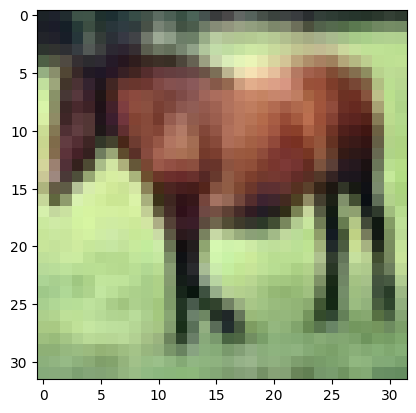

In [ ]:
# Visualize the input image
plt.imshow(X_train_scaled[7])
plt.show()

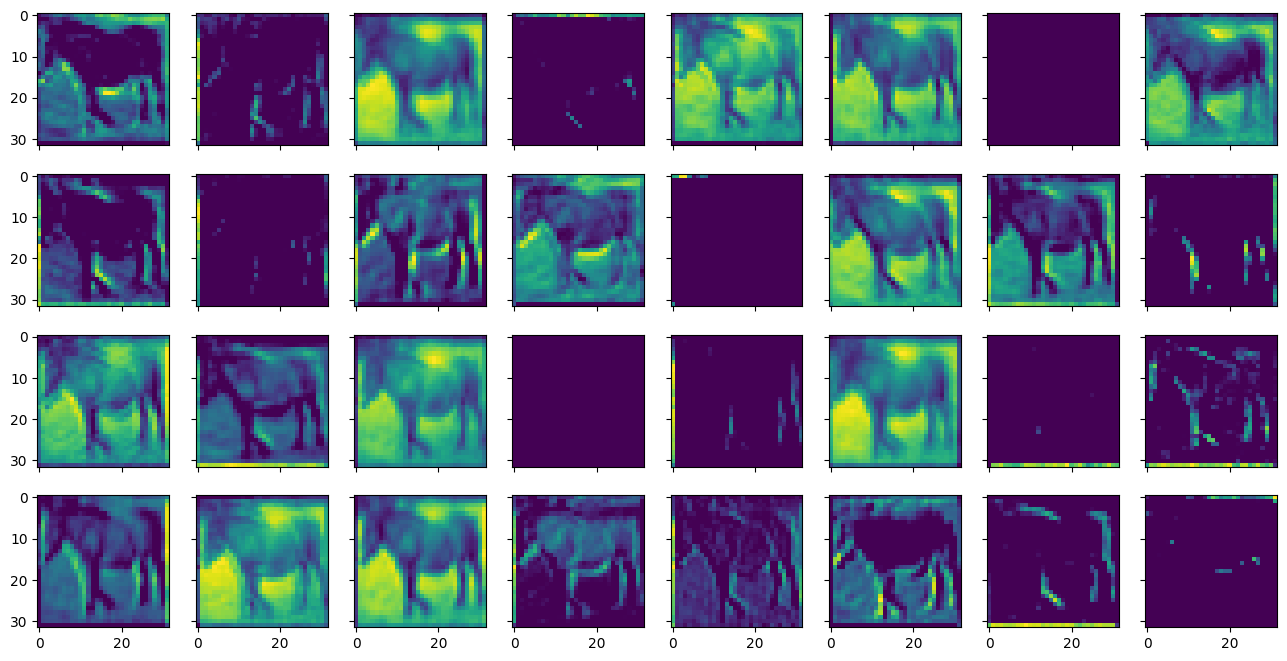

In [ ]:
# Extract output from each layer
extractor = tf.keras.Model(inputs=model.inputs,
outputs=[layer.output for layer in model.layers])
features = extractor(np.expand_dims(X_train_scaled[7], 0))
# Show the 32 feature maps from the first layer
l0_features = features[0].numpy()[0]
fig, ax = plt.subplots(4, 8, sharex=True, sharey=True, figsize=(16,8))
for i in range(0, 32):
  row, col = i//8, i%8
  ax[row][col].imshow(l0_features[..., i])
plt.show()

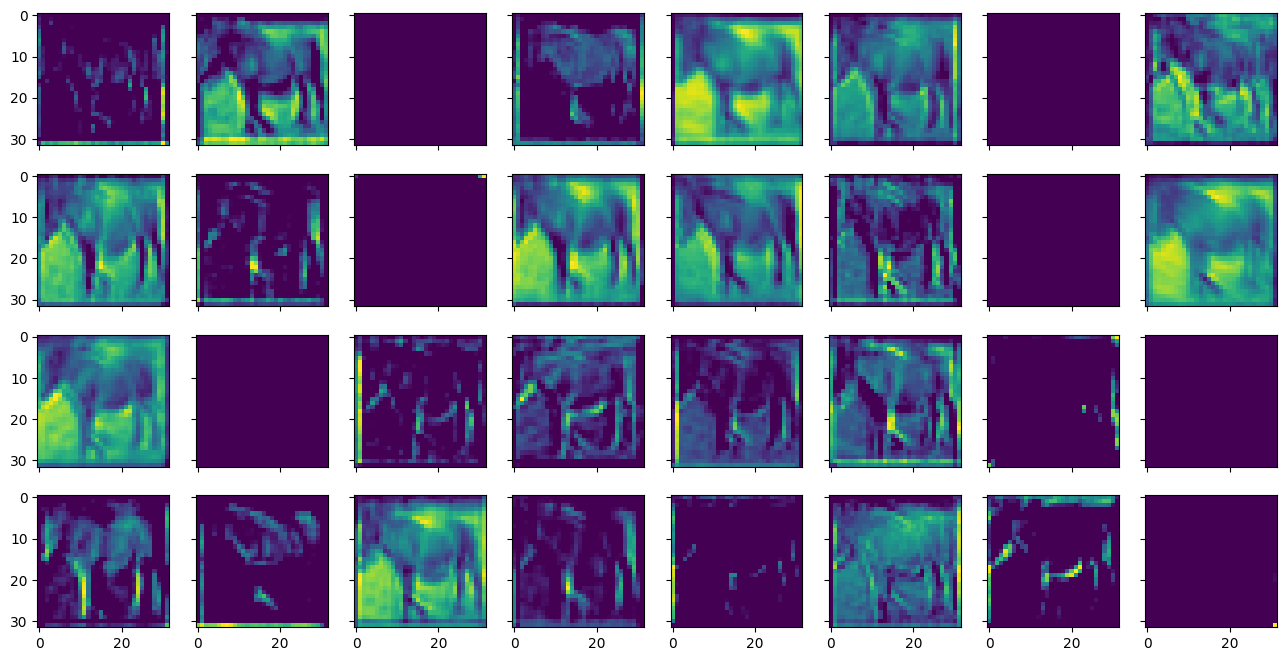

In [ ]:
# Show the 32 feature maps from the third layer
l2_features = features[2].numpy()[0]
fig, ax = plt.subplots(4, 8, sharex=True, sharey=True, figsize=(16,8))
for i in range(0, 32):
  row, col = i//8, i%8
  ax[row][col].imshow(l2_features[..., i])
plt.show()

In [ ]:
model.compile(optimizer="adam",
loss="sparse_categorical_crossentropy",
metrics="sparse_categorical_accuracy")

In [ ]:
model.fit(X_train_scaled, y_train, epochs=25, batch_size=32,
validation_data=(X_test_scaled, y_test))
model.summary()

Epoch 1/25
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5454 - sparse_categorical_accuracy: 0.4410 - val_loss: 1.2167 - val_sparse_categorical_accuracy: 0.5775
Epoch 2/25
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2001 - sparse_categorical_accuracy: 0.5766 - val_loss: 1.0731 - val_sparse_categorical_accuracy: 0.6232
Epoch 3/25
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0761 - sparse_categorical_accuracy: 0.6186 - val_loss: 1.0006 - val_sparse_categorical_accuracy: 0.6511
Epoch 4/25
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0037 - sparse_categorical_accuracy: 0.6449 - val_loss: 0.9439 - val_sparse_categorical_accuracy: 0.6728
Epoch 5/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9511 - sparse_categorical_accuracy: 0.6608 - val_loss: 0.9168 - val_sparse_categorical_accuracy: 0.6772
Epoch 6/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9118 - 